train_size 53
53
(53, 384) (53, 6)
data shape (107, 6) (107, 384)
data_size 107 107


/home/rmqlife/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


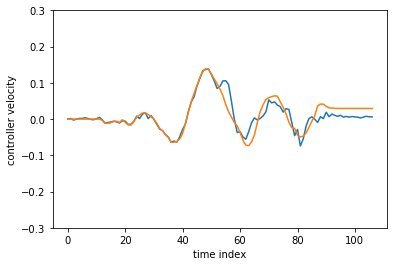

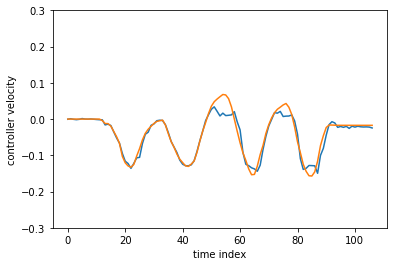

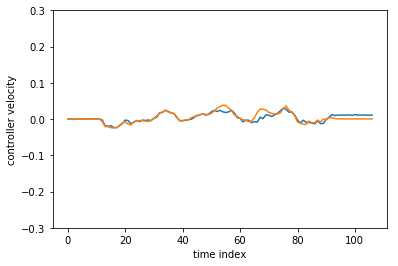

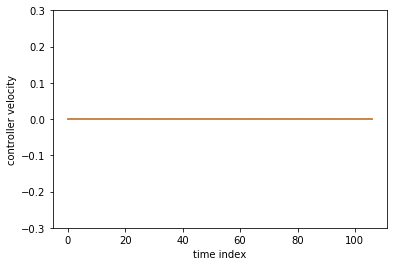

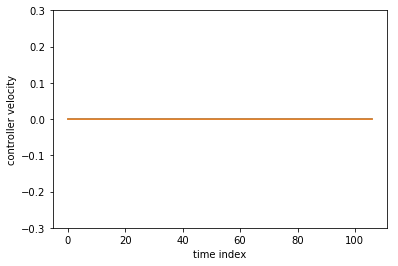

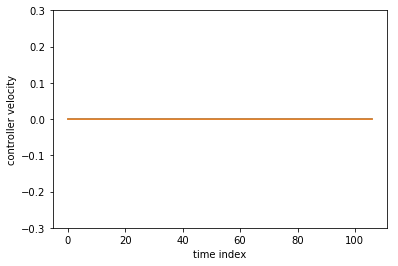

In [1]:
import os, cv2
import matplotlib.pyplot as plt
from regression import *

# data_name = '/home/rmqlife/work/data/2017-09-09-11-08-00/data2.npz'
data_name = '/home/rmqlife/work/data/npz/data_0815-1740.npz'
data = np.load(data_name)
pos = data['pos']
feat = data['feat']

prop = 0.5
train_size = int(len(pos)*prop)
print "train_size", train_size

model = load_model_data(pos[:train_size], feat[:train_size], num_samples=2, alpha=10)
print 'data shape', pos.shape,feat.shape
# Use the model to predict the velocity/direction of end effector
target = 0  # target index  
X = feat - feat[target]
y = pos - pos[target]
y_pred = model.predict(X)

print "data_size", len(y), len(y_pred)
for i in range(y_pred.shape[1]):
    axes = plt.gca()
    axes.set_xlabel('time index')
    axes.set_ylabel('controller velocity')
    axes.set_ylim([-0.3,0.3])
    plt.plot(range(y_pred.shape[0]),y_pred[:,i], label = 'predicted')
    plt.plot(range(y.shape[0]),y[:,i], label = 'ground truth')
    plt.show()
    


In [37]:
import os, cv2
import matplotlib.pyplot as plt
from regression import *


def avg_error(y,y_pred):
    d_avg = 0
    y_avg = 0
    N = min(len(y),len(y_pred))
    d_tt = np.array([])
    y_len_tt = np.array([])
    for i in range(0,N):
        d = y[i,:]-y_pred[i,:]
        d = sum(d**2)**0.5
        d_avg = d_avg + d
        y_len = sum(y[i,:]**2)**0.5
        y_avg = y_avg + y_len
        d_tt = np.hstack([d_tt,d])  if d_tt.size else d
        y_len_tt = np.hstack([y_len_tt,y_len]) if y_len_tt.size else y_len
    d_avg = d_avg/float(N)
    y_avg = y_avg/float(N)
    #print "d_avg",d_avg, "y_avg",y_avg
    #d_tt=d_tt/max(y_len_tt)
    
    min_d_tt = 0.3*np.max(y_len_tt)
#     print "min_d_tt", min_d_tt, np.max(y_len_tt) 
    per = np.count_nonzero(d_tt<min_d_tt)/float(len(d_tt))
#     plt.hist(d_tt)
#     plt.show()
#     axes = plt.gca()
#     plt.plot(range(len(d_tt)), d_tt, label = 'error')
#     plt.plot(range(len(y_len_tt)), y_len_tt, label = 'velocity length')
#     axes.legend()
#     plt.show()
    return per, d_avg

# data_name = '/home/rmqlife/work/data/2017-09-09-11-08-00/data2.npz'
data_name = '/home/rmqlife/work/data/npz/data_0815-1740.npz'

data_name = '/home/rmqlife/work/data/2017-09-05-19-14-52.half/data2.npz'
#data_name = '/home/rmqlife/work/data/2017-09-05-19-14-52.half/combine.npz'
#data_name = '/home/rmqlife/work/data/2017-09-09-11-08-00/data-gray.npz'
#data_name = '/home/rmqlife/work/data/2017-09-08-22-58-21_fabric/combine.npz'
#data_name = '/home/rmqlife/work/data/2017-09-08-22-58-21_fabric/data-gray.npz'
#data_name = '/home/rmqlife/work/data/2017-09-05-19-14-52.half/data-gray.npz'


def test_prop(prop=0.5, alpha = 100):
    data = np.load(data_name)
    pos = data['pos']
    feat = data['feat']
    train_size = int(len(pos)*prop)
    model = load_model_data(pos[:train_size], feat[:train_size], num_samples=2, alpha=alpha)
    target = 0  # target index  
    X = feat - feat[target]
    y = pos - pos[target]
    y_pred = model.predict(X)
    return avg_error( y[len(y)/2:],y_pred[len(y)/2:] )[1]

# print "data_size", len(y), len(y_pred)
# for i in [0]:
#     axes = plt.gca()
#     axes.set_xlabel('time index')
#     axes.set_ylabel('controller velocity')
#     axes.set_ylim([-0.2,0.2])
#     plt.plot(range(y_pred.shape[0]),y_pred[:,i], label = 'predicted')
#     plt.plot(range(y.shape[0]),y[:,i], label = 'ground truth')
#     axes.legend()
#     plt.show()

print 'percent under 30%',

w = np.array([])
for j in range(-4,4):
    j = 10**j
    print j
    
    e = np.array([])
    for i in range(1,20):
        #print i
        p = test_prop(i/40.0,j)
        e = np.vstack((e,p)) if e.size else p
    w = np.hstack((w,e)) if w.size else e

print w

percent under 30% 0.0001
36
(36, 384) (36, 6)
73
(73, 384) (73, 6)
109
(109, 384) (109, 6)
146
(146, 384) (146, 6)
182
(182, 384) (182, 6)
219
(219, 384) (219, 6)
256
(256, 384) (256, 6)
292
(292, 384) (292, 6)
329
(329, 384) (329, 6)
365
(365, 384) (365, 6)
402
(402, 384) (402, 6)
438
(438, 384) (438, 6)
475
(475, 384) (475, 6)
512
(512, 384) (512, 6)
548
(548, 384) (548, 6)
585
(585, 384) (585, 6)
621
(621, 384) (621, 6)
658
(658, 384) (658, 6)
694
(694, 384) (694, 6)
0.001
36
(36, 384) (36, 6)
73
(73, 384) (73, 6)
109
(109, 384) (109, 6)
146
(146, 384) (146, 6)
182
(182, 384) (182, 6)
219
(219, 384) (219, 6)
256
(256, 384) (256, 6)
292
(292, 384) (292, 6)
329
(329, 384) (329, 6)
365
(365, 384) (365, 6)
402
(402, 384) (402, 6)
438
(438, 384) (438, 6)
475
(475, 384) (475, 6)
512
(512, 384) (512, 6)
548
(548, 384) (548, 6)
585
(585, 384) (585, 6)
621
(621, 384) (621, 6)
658
(658, 384) (658, 6)
694
(694, 384) (694, 6)
0.01
36
(36, 384) (36, 6)
73
(73, 384) (73, 6)
109
(109, 384) (109, 6

0
1
2
3
4
5
6
7


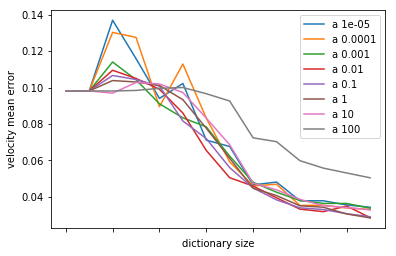

In [79]:
axes = plt.gca()
axes.set_xlabel('dictionary size')
axes.set_ylabel('velocity mean error')
axes.set_xticklabels([])


for i in range(0,w.shape[0],1):
    print i
    e = w[i,:]
    e = e[5:]
    plt.plot(range(len(e)), e, label = 'a '+str(10**(i-5)))
    axes.legend()
plt.show()

In [3]:
home = '/home/rmqlife/work/data/2017-09-09-11-08-00/'
#home = '/home/rmqlife/work/data/2017-09-08-22-58-21_fabric/'
dn_hog = home+'data-hog.npz'
dn_gabor = home+'data2.npz'

data_gb = np.load(dn_gabor)
pos = data_gb['pos']
feat_gb = data_gb['feat']

feat_gb = feat_gb/10000000*5
print feat

data_hog = np.load(dn_hog)
feat_hog = data_hog['feat']

feat = np.hstack((feat_hog,feat_gb))
np.savez(home+'combine',feat=feat,pos=pos)

[[   0.    0.    0. ...,  131.  326.   44.]
 [   0.    0.    0. ...,  109.  342.   35.]
 [   0.    0.    0. ...,  119.  318.   52.]
 ..., 
 [   0.    0.    0. ...,  120.  380.   43.]
 [   0.    0.    0. ...,  123.  375.   54.]
 [   0.    0.    0. ...,  125.  360.   58.]]
